Generating Word Cloud for Most Common Tokens...


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.313 seconds.
Prefix dict has been built successfully.


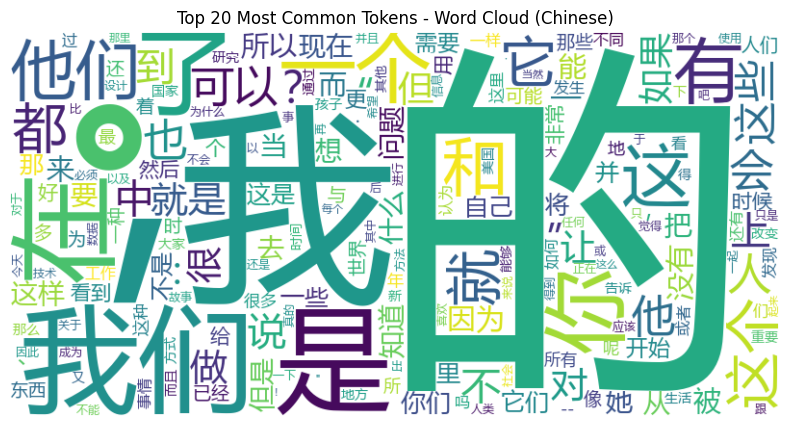

In [2]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from datasets import load_dataset
import jieba  # 中文分詞工具

# 載入 SpaCy 模型（針對中文，可選用 'zh_core_web_sm'，若無此模型可跳過）
# nlp = spacy.load("zh_core_web_sm")

# 載入 IWSLT 2017 英中翻譯資料集
dataset = load_dataset('iwslt2017', 'iwslt2017-en-zh', split='train', trust_remote_code=True)

# ----------------------
# Top 20 Most Common Tokens (Word Cloud)
# ----------------------
print("Generating Word Cloud for Most Common Tokens...")

# 提取所有中文文本
all_text = " ".join([example["translation"]["zh"] for example in dataset])

# 使用 jieba 進行分詞
tokenized_text = " ".join(jieba.cut(all_text))

# 統計詞頻
token_counts = Counter(tokenized_text.split())

# 生成詞雲
wordcloud = WordCloud(
    font_path="msyh.ttc",  # 字體路徑，需指定支持中文的字體，例如微軟雅黑
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(token_counts)

# 繪製詞雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 20 Most Common Tokens - Word Cloud (Chinese)")
plt.show()
